In [30]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [66]:
with open('tickets.pickle','rb') as read_file:
    data = pickle.load(read_file)
with open('mvp.pickle','rb') as read_file:
    mvp = pickle.load(read_file) 
with open('violation.pickle','rb') as read_file:
    mvp_viol = pickle.load(read_file)

In [67]:
mvp_viol.isnull().sum()

ticket_queue         0
violation_0724226    0
violation_0940060    0
violation_0940080    0
violation_0964020    0
violation_0964030    0
violation_0964040    0
violation_0964050    0
violation_0964060    0
violation_0964070    0
violation_0964080    0
violation_0964090    0
violation_0964100    0
violation_0964110    0
violation_0964120    0
violation_0964125    0
violation_0964130    0
violation_0964140    0
violation_0964150    0
violation_0964160    0
violation_0964170    0
violation_0964180    0
violation_0964190    0
violation_0964200    0
violation_0964210    0
violation_0976050    0
violation_0976060    0
violation_0976090    0
violation_0976110    0
violation_0976120    0
violation_0976150    0
violation_0976160    0
violation_0976170    0
violation_0976180    0
violation_0976210    0
violation_0976220    0
violation_0980080    0
violation_0980110    0
violation_0980120    0
violation_0980130    0
violation_0980220    0
violation_1141115    0
dtype: int64

In [68]:
mvpV_train, mvpV_test = train_test_split(mvp_viol, test_size=0.2, random_state=42)

In [69]:
lm_V = LogisticRegression(solver='newton-cg', C=100000) 
lm_V.fit(mvpV_train.drop(columns=['ticket_queue'], mvpV_train['ticket_queue'])

# We can see that the coefficient in question matches the one from statsmodels
print('intercept: ', round(lm_V.intercept_[0], 4))
print('license plate state coef: ', round(lm_1.coef_[0][0], 4))

SyntaxError: invalid syntax (<ipython-input-69-aa72a09d335a>, line 5)

In [43]:
mvp_train, mvp_test = train_test_split(mvp, test_size=0.2, random_state=42)

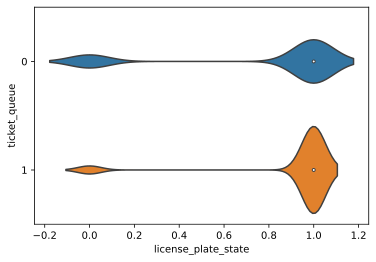

In [44]:
sns.violinplot(x='license_plate_state',
               y='ticket_queue',
               data=mvp_train);

In [45]:
from sklearn.linear_model import LogisticRegression

lm_1 = LogisticRegression(solver='newton-cg', C=100000) 
lm_1.fit(mvp_train[['license_plate_state']], mvp_train['ticket_queue'])

# We can see that the coefficient in question matches the one from statsmodels
print('intercept: ', round(lm_1.intercept_[0], 4))
print('license plate state coef: ', round(lm_1.coef_[0][0], 4))

intercept:  -0.4909
license plate state coef:  1.1859


In [46]:
mvp_eval = mvp_test.copy()
mvp_eval['pred'] = lm_1.predict(mvp_test[['license_plate_state']])
mvp_eval.loc[:, 'pred'] = mvp_eval['pred'].astype('category')
mvp_eval['correct_pred'] = mvp_eval['pred'] == mvp_eval['ticket_queue']

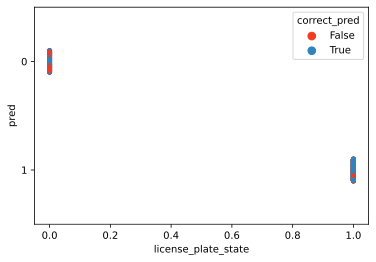

In [47]:
sns.stripplot(data=mvp_eval,
              x='license_plate_state',
              y='pred',
              hue='correct_pred',
              palette={False: '#f03b20', True: '#3182bd'});

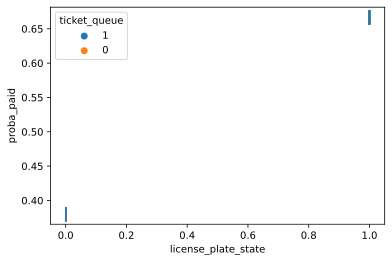

In [48]:
# This is the same model but with proba (returns probabilities instead of class)
mvp_eval['proba_paid'] = lm_1.predict_proba(mvp_eval[['license_plate_state']])[:, 1]

sns.scatterplot(data=mvp_eval,
                x='license_plate_state',
                y='proba_paid',
                hue='ticket_queue',
                marker='|',
                s=200);

In [49]:
cf_matrix = confusion_matrix(mvp_eval['ticket_queue'], mvp_eval['pred'])
cf_matrix

array([[118, 504],
       [ 79, 925]], dtype=int64)

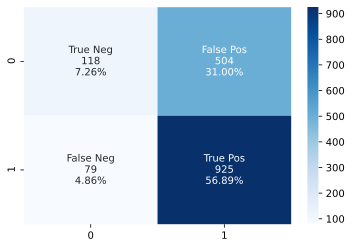

In [50]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [95]:
mvp_eval['ticket_queue'].astype('int32').dtypes
mvp_eval['ticket_queue'].value_counts()

1    1004
0     622
Name: ticket_queue, dtype: int64

In [90]:
lm_1.predict_proba(mvp_eval[['license_plate_state']])[:5]

array([[0.33291637, 0.66708363],
       [0.33291637, 0.66708363],
       [0.33291637, 0.66708363],
       [0.33291637, 0.66708363],
       [0.62030904, 0.37969096]])

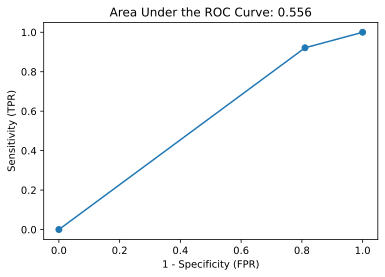

In [96]:
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)
    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");
    
mvp_eval['proba_pay'] = lm_1.predict_proba(mvp_eval[['license_plate_state']])[:, 1]
fpr, tpr, thresholds = roc_curve(mvp_eval['ticket_queue'],mvp_eval['proba_pay'],pos_label='1')


plot_roc(mvp_eval['ticket_queue'], mvp_eval['proba_pay'])

In [98]:
mask = tpr > 0.9
thresholds[mask].max()


0.6670836290459538

## Multiple features: Logistic Regression

In [54]:
with open('mvp2.pickle','rb') as read_file:
    mvp2 = pickle.load(read_file)
mvp2_train, mvp2_test = train_test_split(mvp2, test_size=0.2, random_state=42)

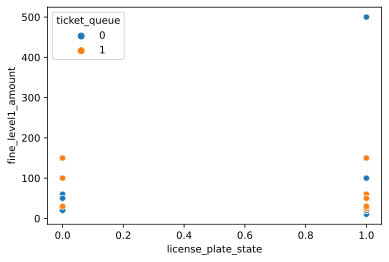

In [55]:
sns.scatterplot(data=mvp2_train,
                x='license_plate_state',
                y='fine_level1_amount',
                hue='ticket_queue');

In [56]:
features = ['license_plate_state', 'fine_level1_amount']

# Since we're using more than one feature, let's scale our features
scaler = StandardScaler()
X_train = scaler.fit_transform(mvp2_train[features])
y_train = mvp2_train['ticket_queue']

In [57]:
lm_2 = LogisticRegression() 
lm_2.fit(X_train, y_train)

LogisticRegression()

In [62]:
cf_matrix2 = confusion_matrix(mvp2_test['ticket_queue'], preds)
cf_matrix2

array([[118, 504],
       [ 80, 924]], dtype=int64)

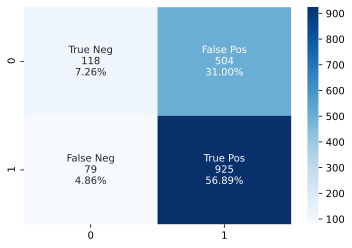

In [60]:
X_test = scaler.transform(mvp2_test[features])
preds = lm_2.predict(X_test)

cf_matrix2 = confusion_matrix(mvp2_test['ticket_queue'], preds)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues');

<ipython-input-101-1f87f039430d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mvp2_test['proba_pay'] = lm_2.predict_proba(mvp2_test[features])[:, 1]


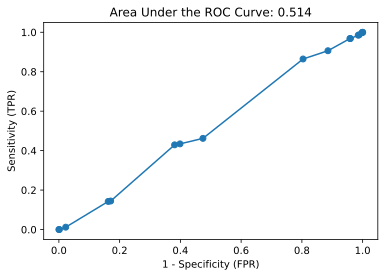

In [101]:
def plot_roc(true, probas):
    auc = roc_auc_score(true, probas)
    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('1 - Specificity (FPR)')
    plt.ylabel('Sensitivity (TPR)');
    plt.title(f"Area Under the ROC Curve: {round(auc, 3)}");
    
mvp2_test['proba_pay'] = lm_2.predict_proba(mvp2_test[features])[:, 1]
fpr, tpr, thresholds = roc_curve(mvp2_test['ticket_queue'],mvp2_test['proba_pay'],pos_label='1')


plot_roc(mvp2_test['ticket_queue'], mvp2_test['proba_pay'])